In [41]:
import os
import sys
from typing import List

# Handle relative import of modules
src_path = os.path.abspath(os.path.join("../../src"))
if src_path not in sys.path:
    sys.path.append(src_path)

In [42]:
from helpers import kaggle_helper

dataset_folder = "dataset"
kaggle_helper.download_dataset_files(
    dataset_author="sanjeetsinghnaik",
    dataset_name="fifa-23-players-dataset",
    dataset_folder=dataset_folder,
)

Listing local csv files in ./dataset.
File Fifa 23 Players Data.csv with size 7496646 found in ./dataset
Listing files associated with Kaggle dataset sanjeetsinghnaik/fifa-23-players-dataset.
File Fifa 23 Players Data.csv with size 7496646 retrieved from Kaggle API.


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option("display.max.columns", None)

df_fifa_players = pd.read_csv(f"{dataset_folder}/Fifa 23 Players Data.csv")
print(
    f"The Fifa player data set has {len(df_fifa_players)} players with {df_fifa_players.shape[1]} variables."
)
df_fifa_players.head()

The Fifa player data set has 18539 players with 89 variables.


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [44]:
print(f"Number of Null in data set = {df_fifa_players.isnull().sum().sum()}")
print(f"Number of NaN in data set = {df_fifa_players.isna().sum().sum()}")

Number of Null in data set = 0
Number of NaN in data set = 0


In [45]:
# Drop columns without interest
columns_to_drop: List[str] = []
text_to_drop: List[str] = [
    "Image",
    # "Euro",
    # "Club",
    # "Team",
    "Contract",
    "Release Clause",
]
for text in text_to_drop:
    df_fifa_players = df_fifa_players.loc[
        :, ~df_fifa_players.columns.str.contains(text, case=False)
    ]

df_fifa_players.head(20)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Club Position,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,RW,30,2021,-,Left,4,4,5,Argentina,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,CF,9,2009,-,Right,4,4,4,France,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,ST,9,2022,-,Right,4,4,5,Poland,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,CM,17,2015,-,Right,5,4,4,Belgium,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,ST,7,2018,-,Right,4,5,4,France,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,30,175,71,2226,471,Liverpool,270000,RW,11,2017,-,Left,3,4,4,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,GK,1,2018,-,Left,3,1,4,Belgium,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,36,193,93,1535,501,FC Bayern München,72000,GK,1,2011,-,Right,4,1,5,Germany,GK,1,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,37,187,83,2159,445,Manchester United,220000,SUB,7,2021,-,Right,4,5,5,Portugal,ST,7,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67,93,95,76,77,90,63,29,95,76,90,95,24,32,24,7,11,15,14,11,90,86,88,88,88,86,88,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dij

In [46]:
df_fifa_players.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Joined On,Weak Foot Rating,Skill Moves,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,2020.367442,2.946437,2.366147,1.086305,68.017746,53.777874,58.024327,63.109553,50.241383,64.775338,49.476833,46.255300,51.846755,59.072226,42.513944,55.898754,47.695129,43.006689,53.568423,58.516263,64.725336,64.838341,63.518906,61.542586,64.059550,57.827661,64.795566,63.040455,65.152004,46.825719,55.668537,46.853282,50.520362,54.191542,47.994444,58.036625,46.747505,48.399159,46.264146,16.402125,16.157182,16.061007,16.205944,16.472895,56.725929,55.819138,55.714925,55.714925,55.714925,55.819138,57.950267,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,2.056372,0.673778,0.772428,0.358753,10.649511,13.619867,9.717950,9.336566,16.392532,9.577715,17.887405,19.623881,17.318947,14.287698,17.635249,18.751691,17.910205,16.997758,14.633838,16.590051,15.280849,15.108259,14.905330,8.900297,14.483193,12.949870,12.293523,16.269330,12.622774,19.362064,16.905505,20.666647,19.660034,13.478006,15.730026,12.036272,20.350228,21.191644,20.701146,17.589457,16.924266,16.680839,17.089109,17.927602,13.475267,14.632018,14.216500,14.216500,14.216500,14.632018,13.905442,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,2002.000000,1.000000,1.000000,1.000000,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,3.000000,3.000000,6.000000,4.000000,9.000000,5.000000,14.000000,15.000000,18.000000,30.000000,20.000000,18.000000,22.000000,14.000000,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,2020.000000,3.000000,2.000000,1.00000

In [47]:
df_fifa_players.describe(include=object)

,Known As,Full Name,Positions Played,Best Position,Nationality,Club Name,Club Position,Club Jersey Number,On Loan,Preferred Foot,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
count,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539
unique,17530,18337,693,15,160,679,20,100,2,2,36,18,29,3,3
top,A. Rodríguez,Tom Davies,CB,CB,England,Free agent,SUB,8,-,Right,-,-,-,Medium,Medium
freq,7,3,2433,3658,1632,92,8053,600,17310,14045,17722,17722,17722,12204,13613


In [48]:
df_fifa_players["International Reputation"].value_counts()

International Reputation
1    17325
2      897
3      255
4       55
5        7
Name: count, dtype: int64

In [49]:
df_great_players = df_fifa_players[df_fifa_players["Overall"] >= 85]
print(f"There are {len(df_great_players)} great players (Overall >= 85)")
df_great_players.tail()

There are 91 great players (Overall >= 85)


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Club Position,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
86,T. Hernández,Theo Hernández,85,90,76000000,LB,LWB,France,24,184,81,2195,483,AC Milan,82000,LB,19,2019,-,Left,3,3,3,France,SUB,22,High,Medium,93,72,76,81,78,83,84,69,74,79,66,83,69,64,68,79,92,94,78,85,76,83,68,90,81,72,82,78,80,73,50,80,74,81,80,12,10,7,7,7,82,81,80,80,80,81,82,84,81,84,86,82,86,85,82,85,20
87,Diogo Jota,Diogo José Teixeira da Silva,85,89,76000000,"CF,LW",ST,Portugal,25,178,73,2183,462,Liverpool,170000,SUB,20,2020,-,Right,5,4,2,Portugal,LW,19,High,High,85,83,75,85,57,77,73,86,84,77,79,85,77,58,72,84,88,82,86,87,85,85,81,83,71,75,85,56,89,77,69,80,53,57,45,7,12,15,9,11,86,83,84,84,84,83,84,84,80,84,72,71,72,70,68,70,21
88,P. Gulácsi,Péter Gulácsi,85,85,26500000,GK,GK,Hungary,32,191,86,1305,456,RB Leipzig,65000,GK,1,2015,-,Right,2,1,3,Hungary,GK,1,Medium,Medium,85,84,76,85,43,83,16,10,23,35,10,19,18,11,31,25,42,44,41,81,42,57,67,37,74,12,34,23,11,44,24,45,25,16,20,85,84,76,83,85,34,29,31,31,31,29,34,34,36,34,34,36,34,34,36,34,85
89,Y. Sommer,Yann Sommer,85,85,17500000,GK,GK,Switzerland,33,183,79,1356,467,Borussia Mönchengladbach,40000,GK,1,2014,-,Right,4,1,3,-,-,-,Medium,Medium,78,81,82,90,50,86,13,13,10,40,8,15,12,13,31,25,48,54,55,82,58,62,73,45,68,12,38,21,15,64,24,57,9,19,12,78,81,82,86,90,35,32,34,34,34,32,39,37,40,37,33,36,33,32,32,32,85
90,M. Reus,Marco Reus,85,85,33500000,"CAM,CF,RM",CAM,Germany,33,180,71,2154,441,Borussia Dortmund,78000,CAM,11,2012,-,Right,4,4,4,Germany,SUB,11,High,Medium,70,84,84,85,53,65,84,84,44,85,87,86,88,85,79,86,75,66,83,86,81,86,68,72,66,81,51,56,84,86,79,86,59,47,59,12,12,13,13,11,82,83,83,83,83,83,85,85,83,85,74,72,74,70,62,70,23


<Axes: xlabel='count', ylabel='Best Position'>

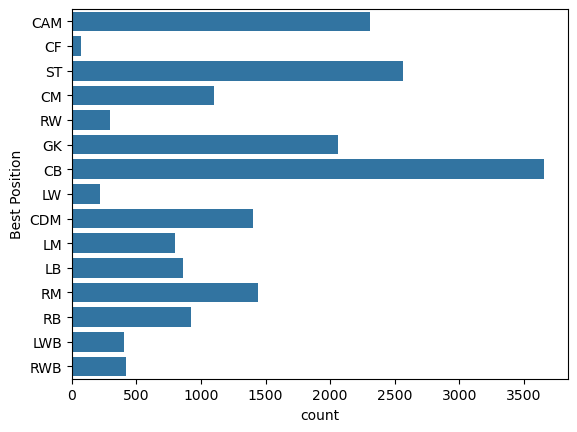

In [50]:
sns.countplot(data=df_fifa_players["Best Position"])

<Axes: xlabel='count', ylabel='Best Position'>

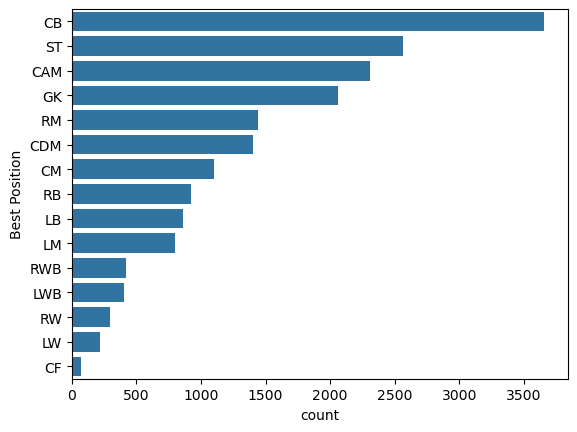

In [51]:
sns.countplot(
    data=df_fifa_players,
    y="Best Position",
    order=df_fifa_players["Best Position"].value_counts().index,
)

<Axes: xlabel='Overall', ylabel='Value(in Euro)'>

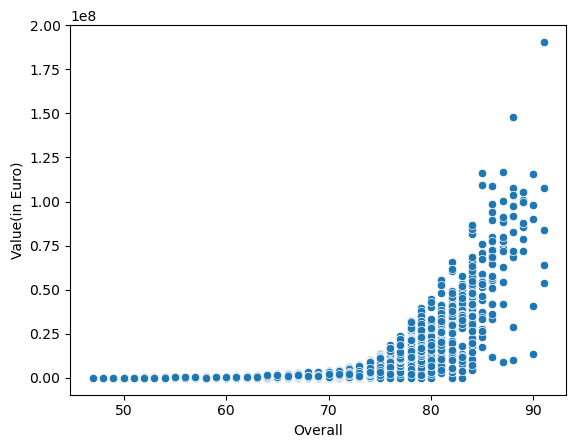

In [53]:
sns.scatterplot(data=df_fifa_players, x="Overall", y="Value(in Euro)")

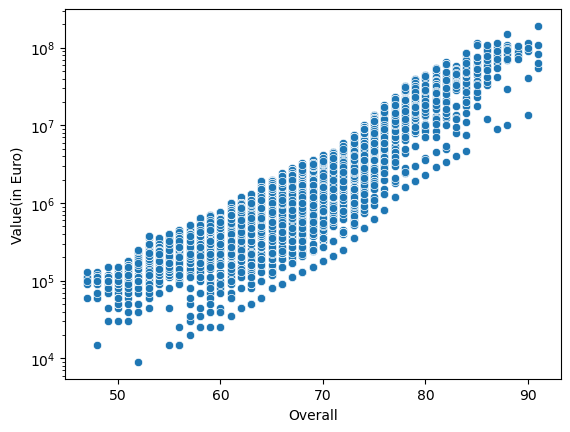

In [54]:
sns.scatterplot(data=df_fifa_players, x="Overall", y="Value(in Euro)")
plt.yscale("log")